# Pandas ile keşifçi veri analizi

Bu doküman Deniz Kılınç'ın kendi üniversitesindeki [bir ders kaydındaki](https://www.youtube.com/watch?v=ZIcBvrJMBl4) notlardan oluşuyor.

In [2]:
import numpy as np
import pandas as ps
import seaborn as sns

df = sns.load_dataset('tips') # Seaborn kütüphanesindeki bir veri setini çağırır.

Bir lokantanın verilerini barındıran veri seti üzerinde keşif yapalım.

In [3]:
df.info()

# Veri çerçevesinin genel özetini verir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


Veri seti bir müşteri veya müşteri grubunun bıraktığı toplam ücreti, bahşişi, hesabı ödeyenin cinsiyetini, sipariş edilen porsiyon saysını, sigara içilip içilmediğini, kaydın hangi gün alındığını, yemek zamanını kapsıyor. 

In [11]:
df.shape 

# Veri çerçevesinde kaç satır ve sütunun olduğunu söyler.

(244, 7)

In [9]:
df.head() 

# Veri çerçevesinin tüm sütunlarıyla ilk 5 satırı görüntüler.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df.tail() 

# Veri çerçevesinin son 5 satırını gösterir.

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [8]:
df.describe().T 

# Sadece sayısal verilere ait temel istatistik bilgilerini gösterir.
# Transpose ile tablonun görünümü değişti.

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [12]:
df.sample(10)

# Veri çerçevesi içerisindeki rastgele 10 değeri alır.

,total_bill,tip,sex,smoker,day,time,size
189,23.10,4.00,Male,Yes,Sun,Dinner,3
20,17.92,4.08,Male,No,Sat,Dinner,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2
110,14.00,3.00,Male,No,Sat,Dinner,2
204,20.53,4.00,Male,Yes,Thur,Lunch,4
226,10.09,2.00,Female,Yes,Fri,Lunch,2
231,15.69,3.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
186,20.90,3.50,Female,Yes,Sun,Dinner,3
53,9.94,1.56,Male,No,Sun,Dinner,2


In [13]:
df.isna().sum()

# Değişkenlerdeki eksik değerleri sayar.

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [14]:
df.count()

# Her bir sütunda kaç satır olduğunu sayar.

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [17]:
df["tip"]

# Sadece tip sütununa bakalım.
# df["tip"][herhangi bir değer] şeklinde de çalışabilir. İstenilen değer alınabilir.

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

Benzersiz değerlere bakalım.

In [18]:
df["day"].unique()

# Kaç adet benzersiz gün var? Tüm haftanın günleri var mı?

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [19]:
df["sex"].unique()

# Cinsiyet beyanında bulunmayan oldu mu?

[Female, Male]
Categories (2, object): [Female, Male]

In [20]:
df["smoker"].unique()

# Sigara içen ve içmeyen olarak mı işaretlenmiş sadece?

[No, Yes]
Categories (2, object): [No, Yes]

In [21]:
df["size"].unique()

# Kaç benzersiz porsiyon var?

array([2, 3, 4, 1, 6, 5])

In [22]:
df["size"].nunique()

# Sayamayacağımız kadar değer olduğunda kaç benzersiz değerin olduğunu söyler.

6

In [23]:
df["time"].unique()

# Yemek zamanı kaç benzersiz türde?

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

Bazı temel istatistik değerlere bakalım.

In [24]:
df["total_bill"].mean()

# Ücretin ortalaması.

19.785942622950824

In [25]:
df["total_bill"].std()

# Bırakılan ücretin standart sapması.

8.902411954856856

In [26]:
df["total_bill"].median()

# Ücretin ortanca değeri.

17.795

In [30]:
df["size"].describe()

# Porsiyonların temel istatistik değerleri.

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

In [31]:
df.groupby(["size"]).mean()

# Her bir porsiyon için ödenen ücret ve bırakılan bahşişlerin ortalaması.

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


In [37]:
df.groupby(["sex"]).describe()["total_bill"]

# Cinsiyete göre ödenen ücretin temel değerleri.

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,20.744076,9.246469,7.25,14.00,18.35,24.71,50.81
Female,87.0,18.056897,8.009209,3.07,12.75,16.40,21.52,44.30


In [38]:
df["tip"].mode()

# En sık tekrar eden bahşiş miktarı.

0    2.0
dtype: float64

In [43]:
df.groupby("size")["tip"].apply(lambda x: np.mean(x))

# Porsiyonlara göre bırakılan bahşişlerin ortalaması. Aralarında korelasyon gözüküyor.

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

In [45]:
df.corr()["size"]["tip"]

# Tahmin edildiği gibi pozitif ve orta düzeyde bir korelasyon var.

0.48929877523035775

In [49]:
df[(df["sex"] == "Female") & (df["tip"] > 5)]

# 5 liranın üzerinde bahşiş bırakan kadın müşteriler.

,total_bill,tip,sex,smoker,day,time,size
52,34.81,5.20,Female,No,Sun,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
155,29.85,5.14,Female,No,Sun,Dinner,5
214,28.17,6.50,Female,Yes,Sat,Dinner,3


In [50]:
df[(df["sex"] == "Female") & (df["tip"] > 5)].sort_values("total_bill", axis=0, ascending=False)

# 5 liranın üzerinde bahşiş bırakan kadın müşteriler ödedikleri ücrete göre sıralandı.

,total_bill,tip,sex,smoker,day,time,size
85,34.83,5.17,Female,No,Thur,Lunch,4
52,34.81,5.20,Female,No,Sun,Dinner,4
155,29.85,5.14,Female,No,Sun,Dinner,5
214,28.17,6.50,Female,Yes,Sat,Dinner,3


In [58]:
df.sort_values("tip", axis=0, ascending=False).head()[["tip", "day", "smoker", "sex", "size"]]

# En yüksek bahşiş bırakan müşteriler miktar, cinsiyet, gün ve sigara durumuna göre sıralandı.
# Cumartesi gelen ve sigara içmeyen erkek müşterilerin en çok bahşiş verebilme ihtimali çıkartılabilir buradan.  

,tip,day,smoker,sex,size
170,10.00,Sat,Yes,Male,3
212,9.00,Sat,No,Male,4
23,7.58,Sat,No,Male,4
59,6.73,Sat,No,Male,4
141,6.70,Thur,No,Male,6


`query()` kullanarak da aynı sorgulamalar yapılabilir.

In [60]:
df_filtered = df.query('tip > 6')[["tip", "day", "smoker", "sex", "size"]].sort_values("tip", axis=0, ascending=False)
df_filtered

,tip,day,smoker,sex,size
170,10.00,Sat,Yes,Male,3
212,9.00,Sat,No,Male,4
23,7.58,Sat,No,Male,4
59,6.73,Sat,No,Male,4
141,6.70,Thur,No,Male,6
183,6.50,Sun,Yes,Male,4
214,6.50,Sat,Yes,Female,3


## Görselleştirme

Sürekli değerleri çizdirelim.

In [61]:
sns.set(rc={'figure.figsize':(8,6)})

# Grafikleri boyutlandırmak için kullandık.

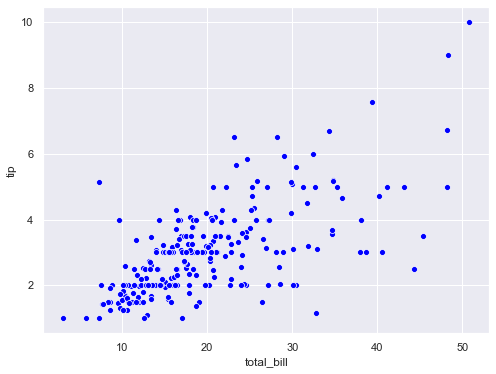

In [65]:
sns.scatterplot(x = "total_bill", y = "tip", data = df, color = "blue")

# Hesap miktarıyla bırakılan bahşiş arasındaki dağılımı gösterir.

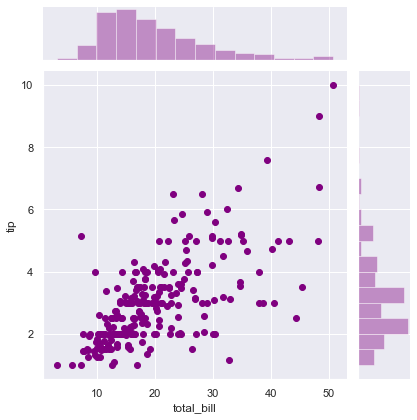

In [64]:
sns.jointplot(x = "total_bill", y = "tip", data = df, color = "purple")

# Değerlerin üst üste bindiği durumlarda aralıkların yoğunluğunu da gösterir.

In [67]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Daha çok porsiyon sipariş verildiğinde daha fazla bahşiş bırakılmış. Porsiyon ile ödenen hesap arasında güçlü ve pozitif bir korelasyon var. Aynı zamanda ücret ve bahşiş arasında da bir ilişki var.

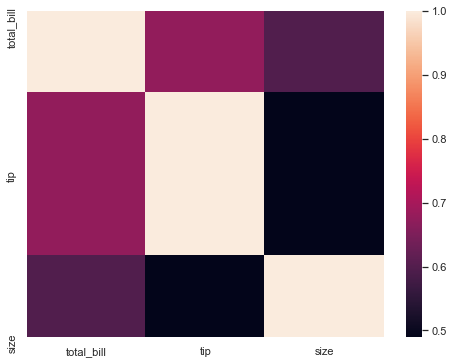

In [70]:
corr = df.corr()
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values)

# Ücret, bahşiş ve porsiyon büyüklüğü arasındaki korelasyona ısı haritası uygular.
# Porsiyon ile bahşiş arasında güçlü sayılabilecek bir pozitif ilişki var. 

Müşteri cinsiyetiyle bırakılan bahşiş arasında ne tür bir ilişki var?

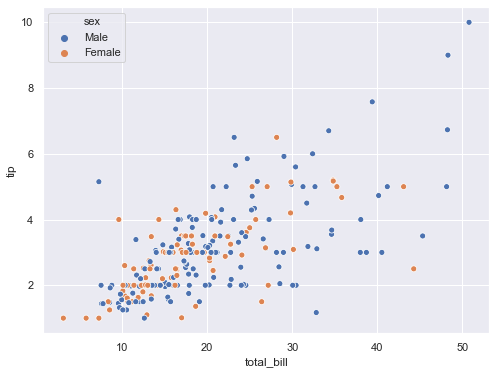

In [71]:
sns.scatterplot(x = "total_bill", y = "tip", data = df, hue = "sex")

Ödenen hesapların dağılımına bakalım.

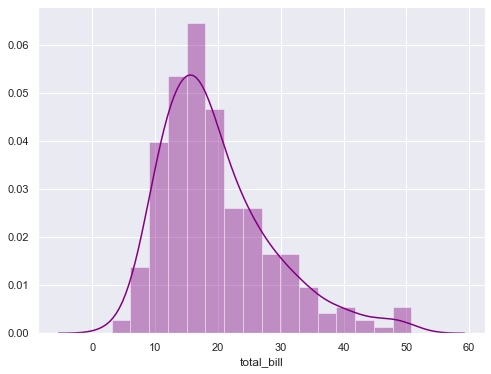

In [73]:
sns.distplot(df["total_bill"], bins = 16, color = "purple")

Bırakılan bahşişlerin de dağılımına bakalım.

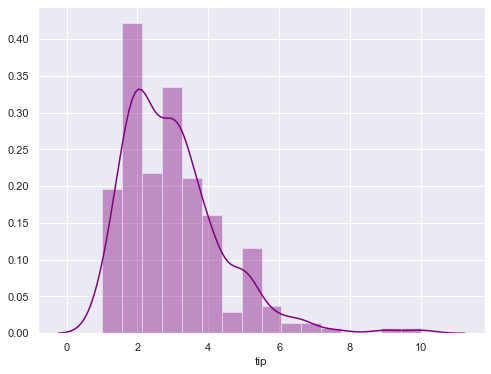

In [74]:
sns.distplot(df["tip"], bins = 16, color = "purple")

Ödenen hesap ve bahşiş yoğunluğuna birlikte bakalım.

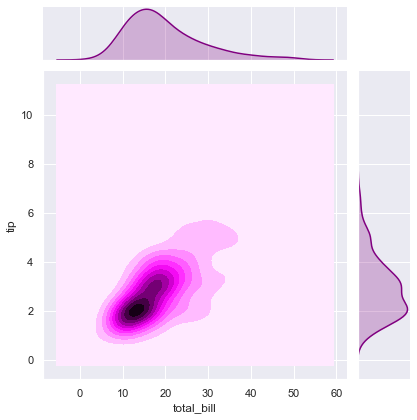

In [75]:
sns.jointplot(x = df["total_bill"], y = df["tip"], kind = "kde", color = "purple")

Ödenen hesap ile bırakılan bahşiş arasındaki ilişkiyle birlikte cinsiyet ve sigara içilip içilmediğine de bakalım.

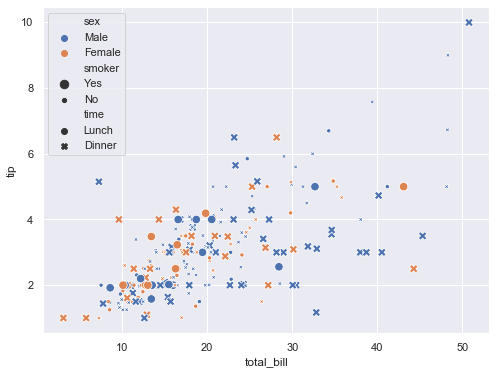

In [77]:
sns.scatterplot(x = "total_bill", y = "tip", data = df, hue = "sex", size = "smoker")

Şimdi buna yemek zamanını da ekleyelim.

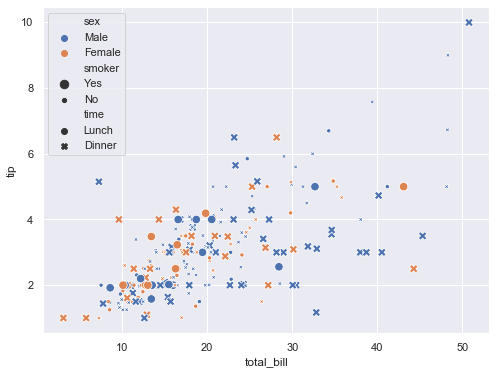

In [78]:
sns.scatterplot(x = "total_bill", y = "tip", data = df, hue = "sex", size = "smoker", style = "time")

Hangi cinsiyet daha bonkör?

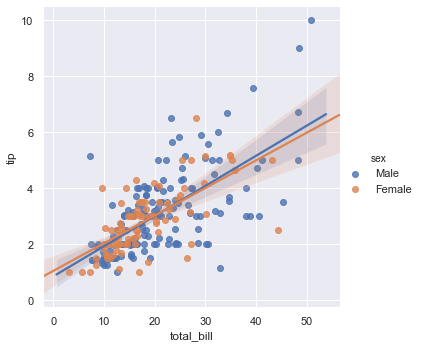

In [79]:
sns.lmplot(x = "total_bill", y = "tip", data = df, hue = "sex")

Servis edilen porsiyonların dağılımına bakalım.

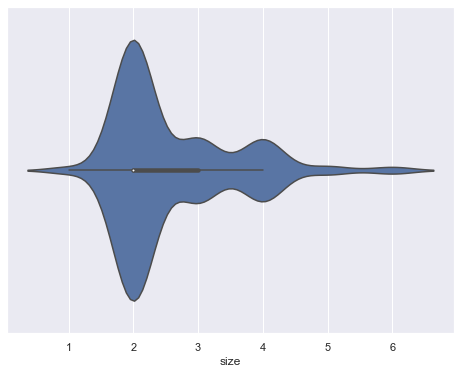

In [82]:
sns.violinplot(x = "size", data = df)

Sigara içme durumuyla ödenen hesap arasında bir ilişki var mı?

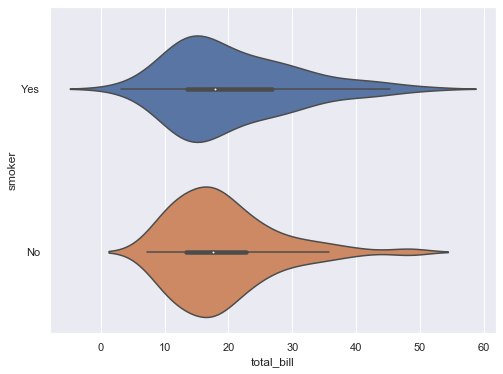

In [83]:
sns.violinplot(x = "total_bill", y = "smoker", data = df)

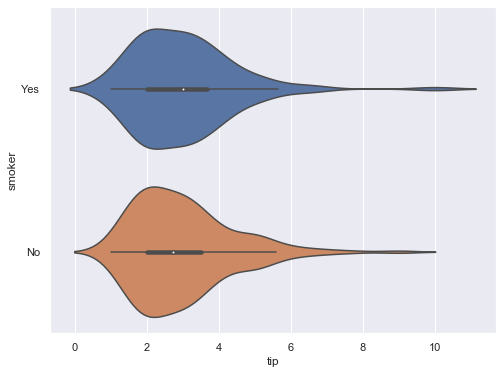

In [84]:
sns.violinplot(x = "tip", y = "smoker", data = df)

Hesap ödeyen müşterilerin cinsiyeti bu lokanta için ayırt edici bir özellik mi?

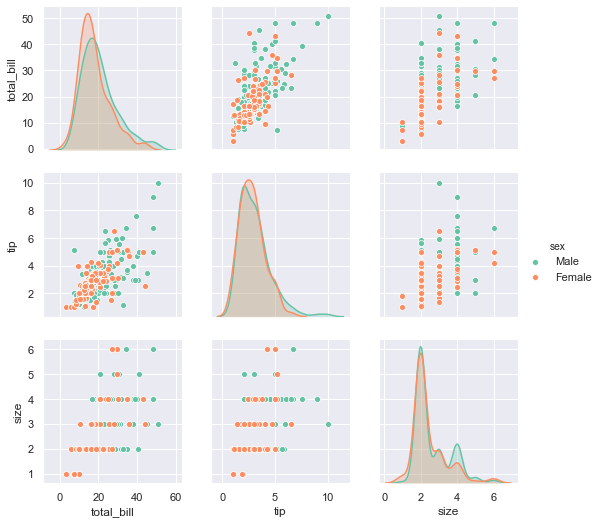

In [85]:
sns.pairplot(df, hue = "sex", palette = "Set2")

Erken ve kadınların ödedidiği hesaplar arasındaki dağılımda nasıl bir fark var?

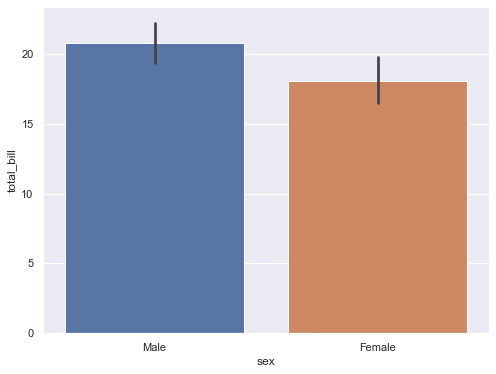

In [86]:
sns.barplot(x = "sex", y = "total_bill", data = df)

Hangi günler hesaplar yoğun?

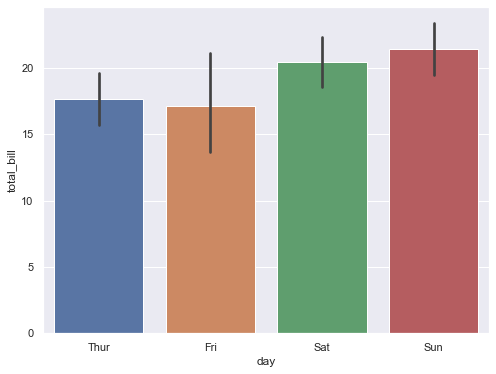

In [87]:
sns.barplot(x = "day", y = "total_bill", data = df)

Buna göre hangi günler daha çok porsiyon verildiği bilgisi de alınabilir.

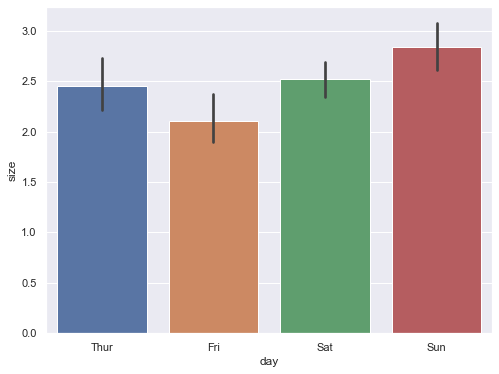

In [88]:
sns.barplot(x = "day", y = "size", data = df)

Hangi günler bahşişler daha yoğun ve yüksek?

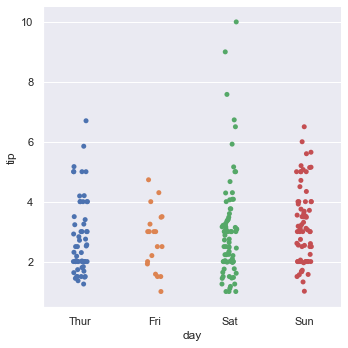

In [89]:
sns.catplot(x = "day", y = "tip", data = df)

Hesap ödeyen müşterilerin cinsiyet oranı ne?

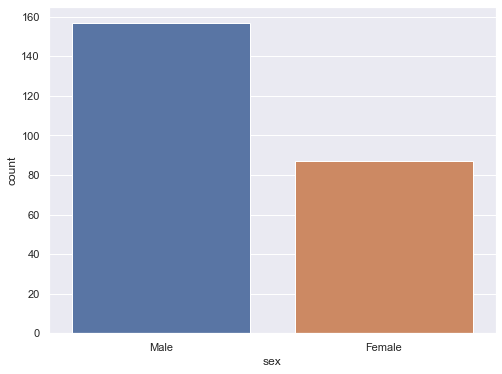

In [90]:
sns.countplot(x = "sex", data = df)

Sigara içen ve içmeyen müşteriler hangi öğün geliyor ve ödedikleri hesap arasındaki ilişkiye bakalım.

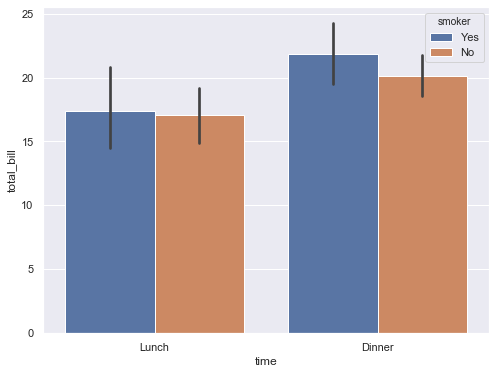

In [99]:
sns.barplot("time", "total_bill", "smoker", data = df)